<h1 align="center">Module 10 Application: Crypto Portfolio Creation</h1>
<h2 align="center"><i>Cluster Cryptocurrencies with K-means</i></h2>

---

### To-Do

* <b>Section 1:</b> Import the Data
* <b>Section 2:</b> Prepare the Data 
* <b>Section 3:</b> Find the Best Value for `k` Using the Original Data
* <b>Section 4:</b> Cluster Cryptocurrencies with K-means Using the Original Data
* <b>Section 5:</b> Optimize Clusters with Principal Component Analysis
* <b>Section 6:</b> Find the Best Value for `k` Using the PCA Data
* <b>Section 7:</b> Cluster the Cryptocurrencies with K-means Using the PCA Data
* <b>Section 8:</b> Visualize and Compare the Results

---

### Required Libraries and Dependencies

In [44]:
import pandas as pd
import numpy as np
import hvplot.pandas
from path import Path
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

### Section 1: Import the Data

<div class="alert alert-block alert-info">
    <b>Note:</b> Looking at the data file <mark>(image below)</mark>, it seems that the index should be the coins and all the columns house data pertinent to that coin in the index (<i>`index_col="coin_id"`</i>). This is a better dataframe structure for downstream plotting and graphing

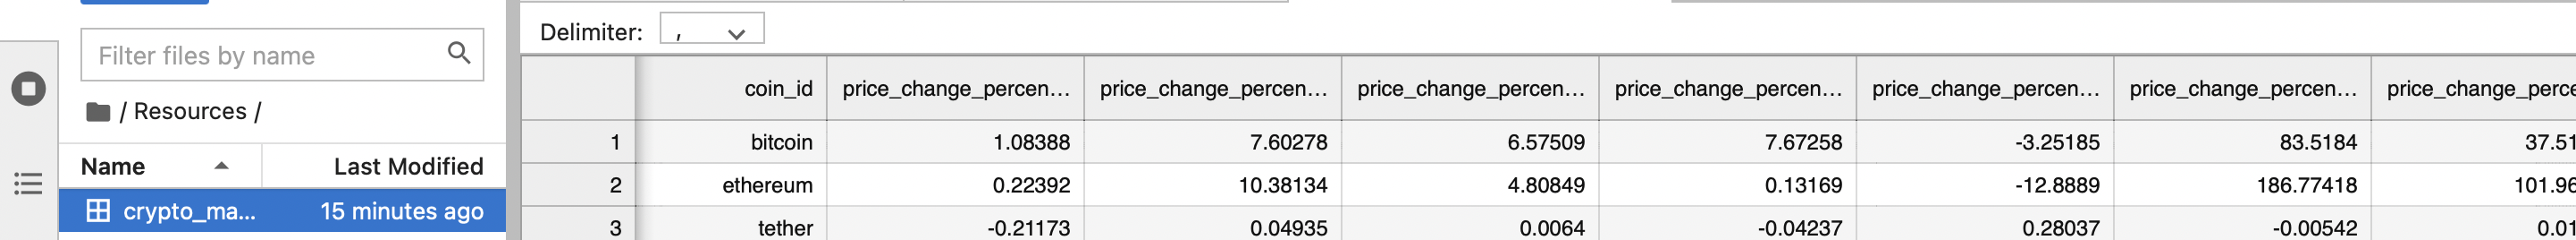
    </div>

In [45]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    Path("Resources/crypto_market_data.csv"),
    index_col="coin_id")

# Display sample data
print("The first 10 records in the df_market_data dataframe:")
display(df_market_data.head(10))

# Generate summary statistics
print("\n")
print("The summary statistics of the df_market_data dataframe:")
df_market_data.describe()

The first 10 records in the df_market_data dataframe:


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408




The summary statistics of the df_market_data dataframe:


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [46]:
# Purely Cosmetic Change:
# Renaming the columns to something not as long for the graph
df_market_data = df_market_data.rename(
    {'price_change_percentage_24h':'pr_chg_pcnt_24h',
     'price_change_percentage_7d':'pr_chg_pcnt_7d',
     'price_change_percentage_14d':'pr_chg_pcnt_14d',
     'price_change_percentage_30d':'pr_chg_pcnt_30d',
     'price_change_percentage_60d':'pr_chg_pcnt_60d',
     'price_change_percentage_200d':'pr_chg_pcnt_200d',
     'price_change_percentage_1y':'pr_chg_pcnt_1y'}, axis=1)


In [47]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=1000,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### DATA PREPARATION
<div class="alert alert-block alert-info">
    <h3><b>Note:</b></h3>We need to prep the crypto data before running the K-Means algorithm. To do
this we will need to do the following:
    <ol type="1">
        <li>Use the `StandardScaler` module from scikit-learn to normalize the CSV file data <mark>(`fit_transform` function)</mark>
        <li>Create a DataFrame that contains the scaled data. <mark>Be sure to set the `coin_id` index</mark>
    </ol> 
    <p>Taken from <a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html">Standard Scaler Documentation</a>  </p>

    
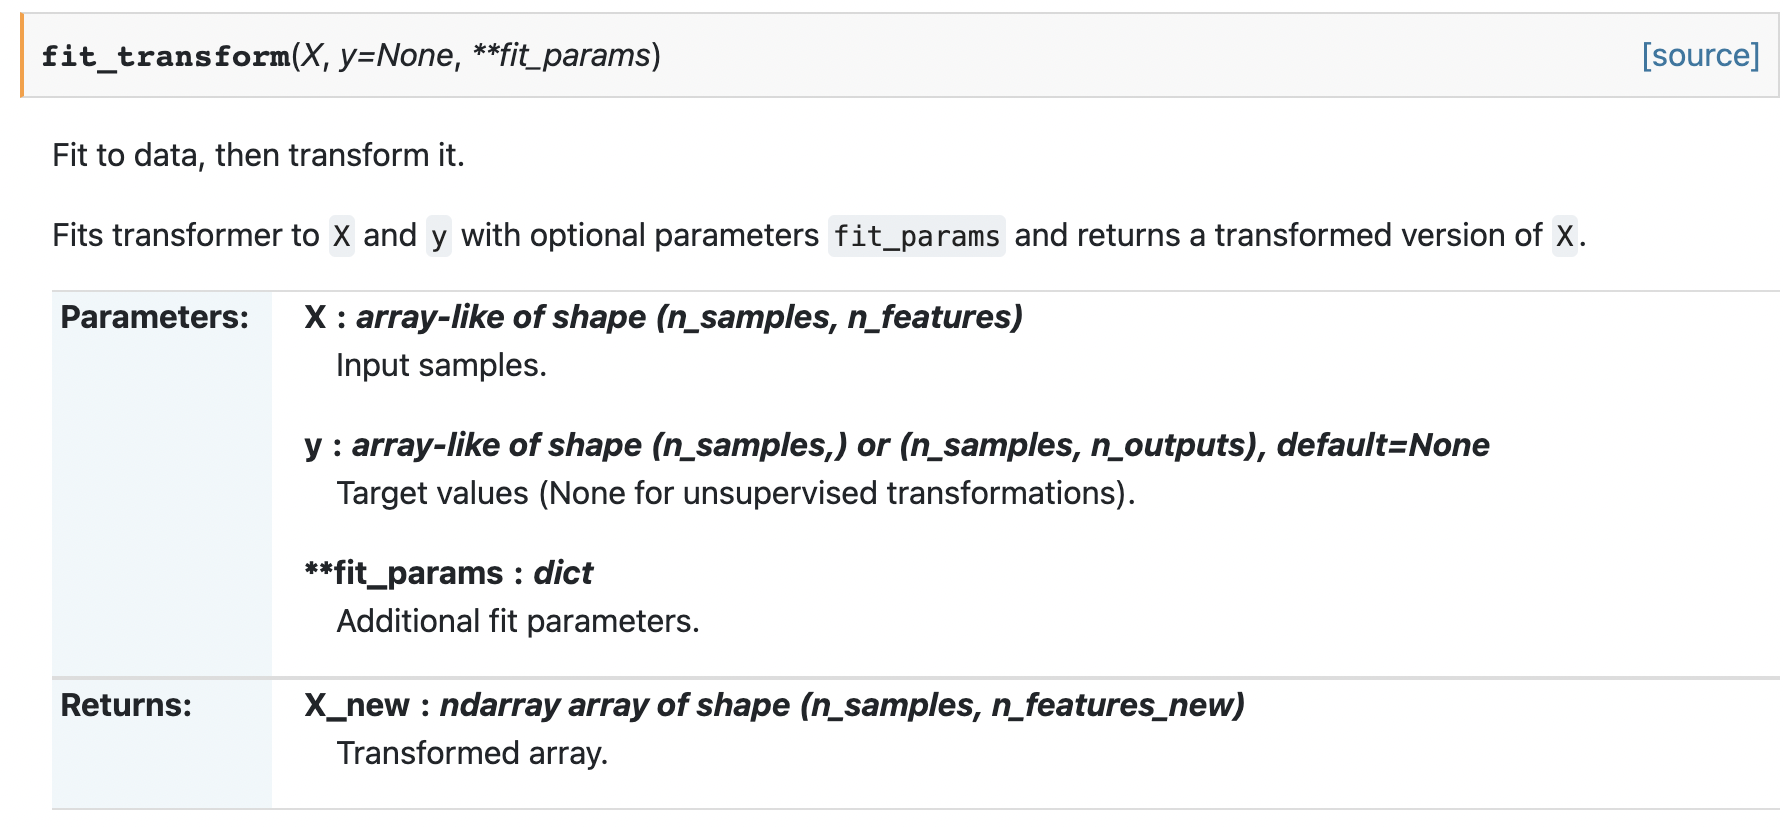
    
</div>

In [48]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaled_data = StandardScaler().fit_transform(df_market_data)

In [49]:
# Create a DataFrame with the scaled data
df_market_data_scaled = pd.DataFrame(
    scaled_data,
    columns=df_market_data.columns
)

# Copy the crypto names from the original data
df_market_data_scaled["coin_id"] = df_market_data.index

# Set the coinid column as index
df_market_data_scaled = df_market_data_scaled.set_index("coin_id")

# Display sample data
df_market_data_scaled.head()

,pr_chg_pcnt_24h,pr_chg_pcnt_7d,pr_chg_pcnt_14d,pr_chg_pcnt_30d,pr_chg_pcnt_60d,pr_chg_pcnt_200d,pr_chg_pcnt_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


---

### Find the Best Value for k Using the Original Data
<div class="alert alert-block alert-info">
<h5><b>Note:</b></h5>
<p> The focus here is to use the elbow method to find the best value for `k`. Once that value is found we will move on to do some clusteriing with the optimal value of `k` we find in this section.
<ol type="1">
    <li>Code the elbow method algorithm to find the best value for `k`. Use a range from 1 to 11. 
    <li>Plot a line chart w/all computed inertia vs. `k` to visually identify the optimal value for `k`.
    <li>Answer the following question: What is the best value for `k`?
</div>

In [50]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
# Note: printing out k helped me greatly. I initially had range(1,11) and that wouldve been wrong

k = list(range(1,12))
print(k)

# Create an empy list to store the inertia values
inertia =[]

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


In [51]:
# Create a for loop to compute the inertia with each possible value of k:

# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_scaled`
# 3. Append the model.inertia_ to the inertia list

for i in k:
    k_model = KMeans(n_clusters=i, random_state=1)
    k_model.fit(df_market_data_scaled)
    inertia.append(k_model.inertia_)

In [52]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k": k, "inertia": inertia}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)

display(df_elbow)

,k,inertia
0,1,287.000000
1,2,195.820218
2,3,123.190482
3,4,79.022435
4,5,65.405923
5,6,52.933559
6,7,47.983124
7,8,37.288187
8,9,33.061685
9,10,28.779752


In [81]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.

# Plot the DataFrame
orig_data_elbow_plot = df_elbow.hvplot.line(
    x="k", 
    y="inertia", 
    title="Orig Data Elbow Curve", 
    xticks=k
)

display(orig_data_elbow_plot)

:Curve   [k]   (inertia)

#### Answer the following question: What is the best value for k?
**Question:** What is the best value for `k`?
**Answer:** # Visually looking at the graph I would say the answer is 4

---

### Cluster Cryptocurrencies with K-means Using the Original Data
<div class="alert alert-block alert-info">
<h5><b>Note:</b></h5>
<p> We will use the K-Means algorithm with the best value for `k` found in the previous section to cluster the cryptocurrencies according to specifc price changes. In order to do that we  need to do the following:</p>
<ol type="1">
<li>Initialize the K-Means model with four clusters using the best value for `k`. 
<li>Fit the K-Means model using the original data.
<li>Predict the clusters to group the cryptocurrencies using the orig data. View resulting array of cluster values.
<li>Create a copy of the orig data & add a new column w/predicted clusters.
<li>Create a hvPlot scatter plot.
</ol>
    
<mark>About the Scatter Plot graph</mark> 
    <ul>
        <li>Set `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`. 
        <li>Color the graph points w/the labels found using K-Means.
        <li>Add the crypto name in the `hover_cols` parameter to identify the crypto represented by each data point
    </ul>
</div>

In [82]:
# Initialize the K-Means model using the best value for k
crypto_model = KMeans(n_clusters=4, random_state=1)
display(crypto_model)

KMeans(n_clusters=4, random_state=1)

In [83]:
# Fit the K-Means model using the scaled data
crypto_model.fit(df_market_data)

KMeans(n_clusters=4, random_state=1)

In [84]:
# Predict the clusters to group the cryptocurrencies using the scaled data
k_lower = crypto_model.predict(df_market_data)


# View the resulting array of cluster values.
display(k_lower)

array([0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 1, 0, 3, 3, 2, 0, 0, 0, 3],
      dtype=int32)

In [85]:
# Create a copy of the DataFrame
mrkt_data = df_market_data_scaled.copy()

In [86]:
# Add a new column to the DataFrame with the predicted clusters
mrkt_data['clusters_lower'] = k_lower

# Display sample data
display(mrkt_data.head())

,pr_chg_pcnt_24h,pr_chg_pcnt_7d,pr_chg_pcnt_14d,pr_chg_pcnt_30d,pr_chg_pcnt_60d,pr_chg_pcnt_200d,pr_chg_pcnt_1y,clusters_lower
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,0
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,0
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,0


In [107]:
# Create a scatter plot using hvPlot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.


orig_mrt_data_plot = mrkt_data.hvplot.scatter(
    x="pr_chg_pcnt_24h",
    y="pr_chg_pcnt_7d",
    hover_cols='coin_id',
    by="clusters_lower",
    title="Crypto Clustering Orig Data, k-Mean Clusters with k=4"
).opts(
    yformatter="%.0f",
    
)

display(orig_mrt_data_plot)

:NdOverlay   [clusters_lower]
   :Scatter   [pr_chg_pcnt_24h]   (pr_chg_pcnt_7d,coin_id)

### [Supplemental] A Brief Note on the Kneed Method and picking `k`

<h5><b>Background:</b></h5> 
<p>I dont like to rely on my visual perspicacity in order to determine any course of action. After searching far and while I came across the <a href=“https://kneed.readthedocs.io/en/stable/“> Kneed Library</a>
If curve=”concave”, kneed will detect knees. If curve=”convex”, it will detect elbows. In our case our curve is convex starting with a max at the y-intercept and it seem that the line  as the values of x increase becomes asymptotic to the x axis. I could be wrong mathematically but I like to think of the elbow as the point where the the slope of the line</p>

<mark><b>Code Snippet</mark></b>
```
from kneed import KneeLocator, DataGenerator as dg

kl = KneeLocator(
    k, 
    inertia, 
    curve="convex", 
    direction="decreasing"
)
elbow=kl.elbow
print('Elbow = {}'.format(elbow))

```

<h4><b>Some things to know:</b></h4>

<b>Direction:</b> 
<ul>
    <li> if the knee/elbow you are trying to identify is on a positive slope use direction=”increasing”
    <li> if the knee/elbow you are trying to identify is on a negative slope, use direction=”decreasing”
</ul>

<b>k:</b>
<ul>
    <li> this is the range of values for k
</ul>

<b>inertia</b> 
<ul>
    <li> array of an inertia  values
</ul>   

In [88]:
from kneed import KneeLocator

kl = KneeLocator(
    k, 
    inertia, 
    curve="convex", 
    direction="decreasing"
)
elbow=kl.elbow
print('Elbow = {}'.format(elbow))

Elbow = 4


<p>The elbow was calculated to be 4 with this method</p>

---

### Optimize Clusters with Principal Component Analysis
<div class="alert alert-block alert-info">
<h5><b>Note:</b></h5>
<p>In this section, you will perform a principal component analysis (PCA) and reduce the features to three principal components.</p>
    
<b>To-Do</b>
<ol type="1">
<li>Create a PCA model instance and set `n_components=3`.
<li>Use the PCA model to reduce to three principal components. 
<li>Retrieve the explained variance, determine how much info can be attributed to each principal component.
<li>Answer: What is the total explained variance of the three principal components?
<li>Create a new DataFrame w/PCA data.
</ol>
</div>

In [89]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)
display(pca)

PCA(n_components=3)

In [90]:
# Use the PCA model with `fit_transform` to reduce to 
# three principal components.
crypto_pca = pca.fit_transform(df_market_data_scaled)

# View the first five rows of the DataFrame. 
display(f"Data Type: {type(crypto_pca)}")
display("The first five rows:")
display(crypto_pca[:5])

# Note: I initially did `crypto_pca.head()` and the error message made me go back and check the data type. This is\
# why I put in the type(crypto_pca). Then I had to look up how to print out the first 5 in an numpy array

"Data Type: <class 'numpy.ndarray'>"

'The first five rows:'

array([[-0.60066733,  0.84276006,  0.46159457],
       [-0.45826071,  0.45846566,  0.95287678],
       [-0.43306981, -0.16812638, -0.64175193],
       [-0.47183495, -0.22266008, -0.47905316],
       [-1.15779997,  2.04120919,  1.85971527]])

In [91]:
# Note: np.set_printoptions(suppress=True)
# explnd_var when displayed would show as scientific notation. I wanted decimal formatting 

In [92]:
# Retrieve the explained variance to determine how much information 
# can be attributed to each principal component.
explnd_var = pca.explained_variance_ratio_
np.set_printoptions(suppress=True)

# Outputs
print(f"The explnd_var  is of type: {type(explnd_var)}")
display(f"The explained variances values:{explnd_var}")
display(f"The tot. explained variance of the 3 principal components is: {round(sum(explnd_var) * 100,3)}%")

The explnd_var  is of type: <class 'numpy.ndarray'>


'The explained variances values:[0.3719856  0.34700813 0.17603793]'

'The tot. explained variance of the 3 principal components is: 89.503%'

#### Answer the following question: What is the total explained variance of the three principal components?

**Question:** What is the total explained variance of the three principal components?

**Answer:** # The total Explaind variance is 89.5% 

In [93]:
# Create a new DataFrame with the PCA data.

pca_df = pd.DataFrame(
    crypto_pca, 
    columns=['PC 1', 'PC 2', 'PC 3'], 
    index=df_market_data_scaled.index)

display(f"This data frame has {pca_df.shape[0]} rows and {pca_df.shape[1]} columns.")
print("\n")
display(pca_df.head(10))


'This data frame has 41 rows and 3 columns.'

,PC 1,PC 2,PC 3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715
binancecoin,-0.516534,1.388377,0.804071
chainlink,-0.450711,0.517699,2.846143
cardano,-0.345600,0.729439,1.478013
litecoin,-0.649468,0.432165,0.600303


---

### Find the Best Value for k Using the PCA Data
<div class="alert alert-block alert-info">
<h5><b>Note:</b></h5>
    <p>We will use the elbow method to find the best value for `k` using the PCA data.</p>
    
<b>To-Do</b>
    <ol type="1">
        <li>Code the elbow method algorithm. Use PCA data to find the best value for `k`.
        <li>Plot a line chart with all the inertia vs `k` values to visually identify the optimal value for `k`.
        <li>Answer: <u>What's the best value for k when using the PCA data ?</u>?
        <li>Answer: <u>Does it differ from the best k value found using the original data?</u>
</div>

In [94]:
# Note checking the dataframe with a display
display(df_market_data_scaled.head())
display(pca_df.head())


,pr_chg_pcnt_24h,pr_chg_pcnt_7d,pr_chg_pcnt_14d,pr_chg_pcnt_30d,pr_chg_pcnt_60d,pr_chg_pcnt_200d,pr_chg_pcnt_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


,PC 1,PC 2,PC 3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


In [95]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k_pca = list(range(1,12))
print(k_pca)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


In [96]:
# Create an empy list to store the inertia values
inertia_pca =[]

In [97]:
# Create a for loop to compute the inertia with each possible value of k

# Inside the loop:
# Part 1: Create a KMeans model using the loop counter for the n_clusters
# Part 2: Fit the model to the data using `df_market_data_pca`
# Part 3: Append the model.inertia_ to the inertia list

for i in k_pca:
    k_pca_model = KMeans(n_clusters=i, random_state=0)
    k_pca_model.fit(pca_df)
    inertia_pca.append(k_pca_model.inertia_)

In [98]:
# Create a dictionary with the data to plot the Elbow curve

elbow_pca_data = {"k_pca": k_pca, "inertia_pca": inertia_pca}

display(elbow_pca_data)
# Create a DataFrame with the data to plot the Elbow curve
df_pca_elbow = pd.DataFrame(elbow_pca_data)



# Create a DataFrame with the data to plot the Elbow curve
#display(df_pca_elbow)

{'k_pca': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 'inertia_pca': [256.8740855678925,
  165.90199402036015,
  93.77462568057307,
  49.6654966517974,
  37.87874703346252,
  27.618971787957456,
  21.18277586295735,
  17.389823204768913,
  13.593650379876738,
  10.55935756279344,
  8.007418066730603]}

In [99]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.

# Plot the DataFrame
pca_elbow_plot = df_pca_elbow.hvplot.line(
    x="k_pca", 
    y="inertia_pca", 
    title="PCA Elbow Curve", 
    xticks=k_pca
)
display(pca_elbow_plot)

:Curve   [k_pca]   (inertia_pca)

In [100]:
kl = KneeLocator(
    k_pca, 
    inertia_pca, 
    curve="convex", 
    direction="decreasing"
)
elbow_pca=kl.elbow
print('Elbow = {}'.format(elbow_pca))

Elbow = 4


#### Answer the following questions: What is the best value for k when using the PCA data? Does it differ from the best k value found using the original data?
* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** # My Answer both visually and with the kneeds method 4


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** # No it doesnt differ

---

### Cluster Cryptocurrencies with K-means Using the PCA Data

In this section, you will use the PCA data and the K-Means algorithm with the best value for `k` found in the previous section to cluster the cryptocurrencies according to the principal components.

1. Initialize the K-Means model with four clusters using the best value for `k`. 

2. Fit the K-Means model using the PCA data.

3. Predict the clusters to group the cryptocurrencies using the PCA data. View the resulting array of cluster values.

4. Add a new column to the DataFrame with the PCA data to store the predicted clusters.

5. Create a scatter plot using hvPlot by setting `x="PC1"` and `y="PC2"`. Color the graph points with the labels found using K-Means and add the crypto name in the `hover_cols` parameter to identify the cryptocurrency represented by each data point.

In [101]:
# Initialize the K-Means model using the best value for k
# Define the model with 3 clusters
crypto_pca_model = KMeans(n_clusters=4, random_state=0)

# Fit the model
crypto_pca_model.fit(pca_df)

# Make predictions
k_pca_3 = crypto_pca_model.predict(pca_df)
display(k_pca_3)

# Create a copy of the DataFrame with the PCA data
pca_crypto_data = pca_df.copy()


# Add a class column with the labels
pca_crypto_data["clusters_lower"] = k_pca_3

display(pca_crypto_data.head(7))
display(pca_crypto_data.tail(7))

array([0, 0, 3, 3, 0, 0, 0, 0, 0, 3, 3, 3, 3, 0, 3, 0, 3, 3, 0, 3, 3, 0,
       3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 1, 0, 3, 3, 2, 3, 3, 3, 3],
      dtype=int32)

,PC 1,PC 2,PC 3,clusters_lower
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,0
ethereum,-0.458261,0.458466,0.952877,0
tether,-0.433070,-0.168126,-0.641752,3
ripple,-0.471835,-0.222660,-0.479053,3
bitcoin-cash,-1.157800,2.041209,1.859715,0
binancecoin,-0.516534,1.388377,0.804071,0
chainlink,-0.450711,0.517699,2.846143,0


,PC 1,PC 2,PC 3,clusters_lower
coin_id,,,,
havven,0.865762,-2.261882,0.275583,3
omisego,0.111675,0.428316,-1.205398,3
celsius-degree-token,4.792395,6.767679,-1.986985,2
ontology,-0.632355,-2.108117,-0.652227,3
ftx-token,-0.593142,0.021485,0.209911,3
true-usd,-0.458131,-0.135734,-0.635284,3
digibyte,-0.297910,-0.191126,-0.909602,3


In [108]:
# Create a scatter plot using hvPlot by setting 
# `x="PC1"` and `y="PC2"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.


plot_pca_clusters = pca_crypto_data.hvplot.scatter(
    x="PC 1", 
    y="PC 2", 
    by='clusters_lower',
    title="Crypto Clustering PCA Data, K-Mean Clusters with k=4.",
    hover_cols='coin_id'
)

display(plot_pca_clusters)   



:NdOverlay   [clusters_lower]
   :Scatter   [PC 1]   (PC 2,coin_id)

---

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

1. Create a composite plot using hvPlot and the plus (`+`) operator to contrast the Elbow Curve that you created to find the best value for `k` with the original and the PCA data.

2. Create a composite plot using hvPlot and the plus (`+`) operator to contrast the cryptocurrencies clusters using the original and the PCA data.

3. Answer the following question: After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

> **Rewind:** Back in Lesson 3 of Module 6, you learned how to create composite plots. You can look at that lesson to review how to make these plots; also, you can check [the hvPlot documentation](https://holoviz.org/tutorial/Composing_Plots.html).

In [109]:
# Composite plot to contrast the Elbow curves
orig_data_elbow_plot + pca_elbow_plot

:Layout
   .Curve.I  :Curve   [k]   (inertia)
   .Curve.II :Curve   [k_pca]   (inertia_pca)

In [110]:
# Composite plot to contrast the clusters
orig_mrt_data_plot + plot_pca_clusters

:Layout
   .NdOverlay.I  :NdOverlay   [clusters_lower]
      :Scatter   [pr_chg_pcnt_24h]   (pr_chg_pcnt_7d,coin_id)
   .NdOverlay.II :NdOverlay   [clusters_lower]
      :Scatter   [PC 1]   (PC 2,coin_id)

#### Answer the following question: After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** # 

There are some benefits that come with using fewer features for K-Means:
1.  I noticed that the the y-intercept for the pca elbow curve was less than that for the elbow curve done with the original data. I would imagine that the the y-intercept value of the curve is equal to the yinitial. So the less components we have the less the magnitude of the initial inertia. If inertia "measures how well a dataset was clustered by K-Means, then I would imagine the greater the inertia, the less a dataset can be clustered by K means. To quote the source listed below, 'a good model is one with low inertia AND a low number of clusters (k). 
**SOURCE:**
<a href="https://www.codecademy.com/learn/machine-learning/modules/dspath-clustering/cheatsheet#:~:text=K%2DMeans%3A%20Inertia,number%20of%20clusters%20(%20K%20)">K means Clustering</a>

2. There seemed to be much less outliers. Looking at the second clustering graph, the x-axis goes from -1 to 8. It doesnt take into considering the 3 data points we had after -1 on the x-axis. In my opinion  not having to deal with the totality of the dataset and ignoring some outliers helped to have a cleaner graph.

I was able to find the following resource that reiterates my point about reducing noise:

"PCA eliminates those low variance dimension (noise), so itself adds value (and form a sense similar to clustering) by focusing on those key dimension In simple terms, it is just like X-Y axis is what help us master any abstract mathematical concept but in a more advance manner."
**SOURCE:**
<a href="https://stats.stackexchange.com/questions/183236/what-is-the-relation-between-k-means-clustering-and-pca"> K-mean and PCA </a>